### Jupyter часть

- [V] Подготовка данных
  - Скачать известный датасет **Титаник** (train и test)
  - Загрузить их как `pandas.DataFrame`
  - Корректно конкатенировать их в один DataFrame по ключу `PassengerID`.
  Отсутствующие данные должны быть `Nan`. Все столбцы должны быть корректных типов, в частности, выживание, класс и пол должны быть категориальными
- [V] Анализ таблицы
  - Визуализировать базовую статистику таблицы. В каком классе было больше всего пассажиров?
  - Группировать таблицу в два уровня: класс и пол, по среднему значению возраста. Кто из возможных комбинаций самый юный, кто самый взрослый? Насколько отличаются эти значения?
  - Отобрать только выживших пассажиров с фамилией, начинающейся на “K”. Отсортировать их по убыванию стоимости билета. Кто заплатил больше всех? Кто меньше всех?
  - Какое максимальное количество родных было с выжившим пассажиром?
- [V] Визуализация
  - Необходимо построить по данным таблицы 10 *различных* графиков на своё усмотрение и фантазию.
  Использовать можно любые средства, однако рекомендуется Seaborn и Plotly.
  - 5 графиков должно быть интерактивными
  - 1 график необходимо сделать 3D
  - Среди представленных графиков должны быть
    - [V] Scatter plot
    - [V] Linear plot (with several lines)
    - [V] Histogram
    - [V] Bar chart
    - [V] Horizontal bar chart
    - [V] Pie chart
    - [V] Box chart
    - [V] Sunburst chart

## Подготовка данных

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [5]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
test_labels_df = pd.read_csv('gender_submission.csv') 

In [6]:
test_full = test_df.merge(test_labels_df, on='PassengerId', how='left')  # we combine them to assign the Survived values to test.csv
combined_df = pd.concat([train_df, test_full], ignore_index=True)

## Анализ данных

In [7]:
combined_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [8]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [9]:
combined_df['Pclass'].value_counts()

Pclass
3    709
1    323
2    277
Name: count, dtype: int64

#### 3 класс имел самое большое количество пассажиров

In [10]:
combined_df.groupby(['Pclass', 'Sex'], observed=True)['Age'].mean() 

Pclass  Sex   
1       female    37.037594
        male      41.029272
2       female    27.499223
        male      30.815380
3       female    22.185329
        male      25.962264
Name: Age, dtype: float64

- Самый юный: женщины 3 класса
- Самый взрослый: мужчины 1 класса
- Разница 18,843943

In [23]:
survived_k = combined_df[(combined_df['Survived'] == 1) & (combined_df['Name'].str.upper().str.startswith('K'))].copy()
survived_k.sort_values('Fare', ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Total_relatives,AgeGroup,Survived_numeric
1215,1216,1,1,"Kreuchen, Miss. Emilie",female,39.0,0,0,24160,211.3375,NaN,S,0,Взрослые,1
935,936,1,1,"Kimball, Mrs. Edwin Nelson Jr (Gertrude Parsons)",female,45.0,1,0,11753,52.5542,D19,S,1,Взрослые,1
621,622,1,1,"Kimball, Mr. Edwin Nelson Jr",male,42.0,1,0,11753,52.5542,D19,S,1,Взрослые,1
457,458,1,1,"Kenyon, Mrs. Frederick R (Marion)",female,NaN,1,0,17464,51.8625,D21,S,1,NaN,1
316,317,1,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,NaN,S,1,Молодые,1
184,185,1,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.0,0,2,315153,22.0250,NaN,S,2,Дети,1
1056,1057,1,3,"Kink-Heilmann, Mrs. Anton (Luise Heilmann)",female,26.0,1,1,315153,22.0250,NaN,S,2,Молодые,1
1137,1138,1,2,"Karnes, Mrs. J Frank (Claire Bennett)",female,22.0,0,0,F.C.C. 13534,21.0000,NaN,S,0,Молодые,1
1140,1141,1,3,"Khalil, Mrs. Betros (Zahie Maria"" Elias)""",female,NaN,1,0,2660,14.4542,NaN,C,1,NaN,1
706,707,1,2,"Kelly, Mrs. Florence ""Fannie""",female,45.0,0,0,223596,13.5000,NaN,S,0,Взрослые,1


- Заплатил больше всех Kreuchen, Miss. Emilie
- Заплатили меньше всех Kelly, Miss. Anna Katherine "Annie Kate"

In [24]:
combined_df['Total_relatives'] = combined_df['SibSp'] + combined_df['Parch']
survived_k = combined_df[(combined_df['Survived'] == 1)]
survived_k.sort_values('Total_relatives', ascending=False)[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Total_relatives,AgeGroup,Survived_numeric
1256,1257,1,3,"Sage, Mrs. John (Annie Bullen)",female,NaN,1,9,CA. 2343,69.5500,NaN,S,10,NaN,1
1079,1080,1,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.5500,NaN,S,10,NaN,1
1031,1032,1,3,"Goodwin, Miss. Jessie Allis",female,10.0,5,2,CA 2144,46.9000,NaN,S,7,Дети,1
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S,6,Взрослые,1
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S,6,Дети,1


- Максимальное количество родных у Sage, Mrs. John (Annie Bullen):	10

## Визуализация

Scatter plot

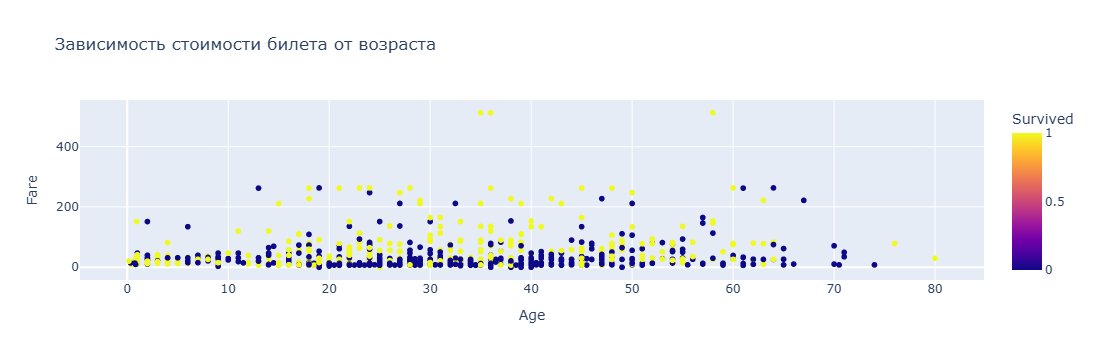

In [28]:
fig1 = px.scatter(combined_df.dropna(subset=['Age', 'Fare']), 
                 x='Age', y='Fare', color='Survived',
                 title='Зависимость стоимости билета от возраста',
                 hover_data=['Name', 'Pclass', 'Sex'])
fig1.show()

Linear Plot with Several Lines

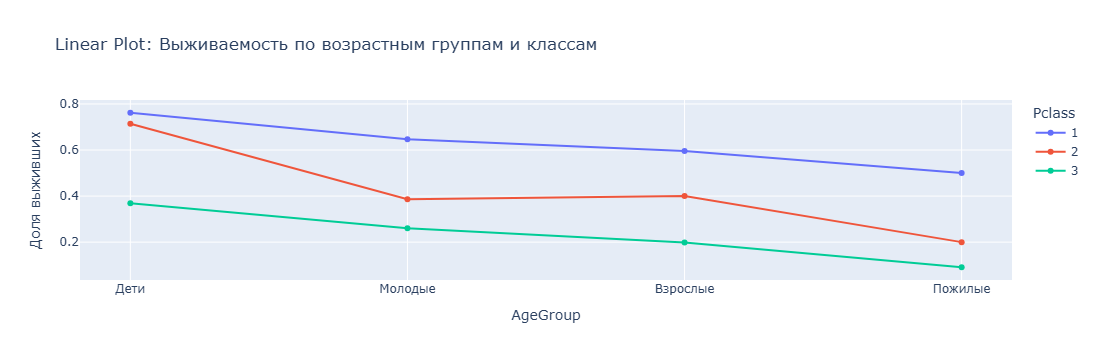

In [14]:
combined_df['AgeGroup'] = pd.cut(combined_df['Age'], bins=[0, 18, 30, 50, 100], 
                                labels=['Дети', 'Молодые', 'Взрослые', 'Пожилые'])

combined_df['Survived_numeric'] = combined_df['Survived'].astype('int')

survival_by_age_group = combined_df.groupby(['AgeGroup', 'Pclass'], observed=False)['Survived_numeric'].mean().reset_index()

fig2 = px.line(survival_by_age_group, x='AgeGroup', y='Survived_numeric', color='Pclass',
              title='Linear Plot: Выживаемость по возрастным группам и классам',
              labels={'Survived_numeric': 'Доля выживших'},
              markers=True)
fig2.show()

Histogram

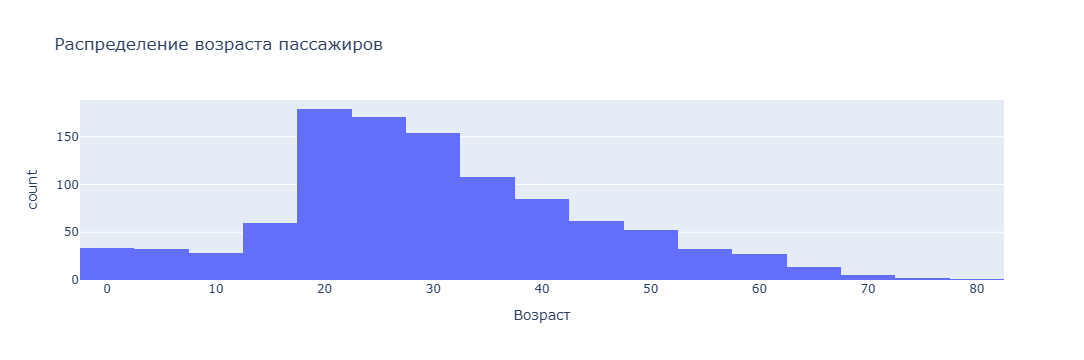

In [29]:
fig3 = px.histogram(combined_df, x='Age', nbins=30, 
                   title='Распределение возраста пассажиров',
                   labels={'Age': 'Возраст', 'count': 'Количество пассажиров'})
fig3.show()

Bar Chart

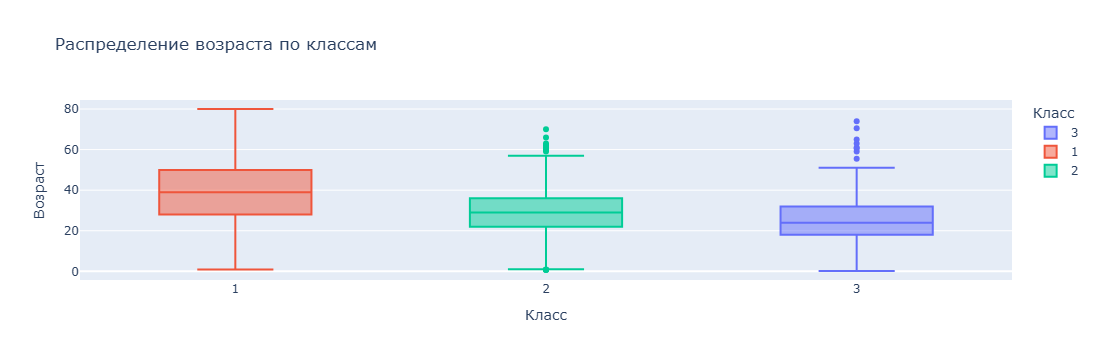

In [31]:
fig7 = px.box(combined_df, x='Pclass', y='Age', color='Pclass',
             title='Распределение возраста по классам',
             labels={'Pclass': 'Класс', 'Age': 'Возраст'})
fig7.show()

Horizontal Bar Chart

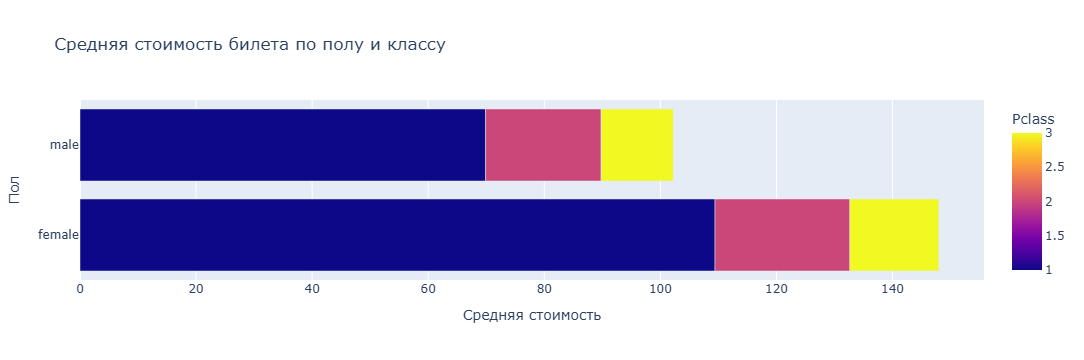

In [30]:
fare_by_sex_class = combined_df.groupby(['Sex', 'Pclass'])['Fare'].mean().reset_index()
fig5 = px.bar(fare_by_sex_class, y='Sex', x='Fare', color='Pclass',
             title='Средняя стоимость билета по полу и классу',
             orientation='h',
             barmode='group',
             labels={'Fare': 'Средняя стоимость', 'Sex': 'Пол'})
fig5.show()

Pie Chart

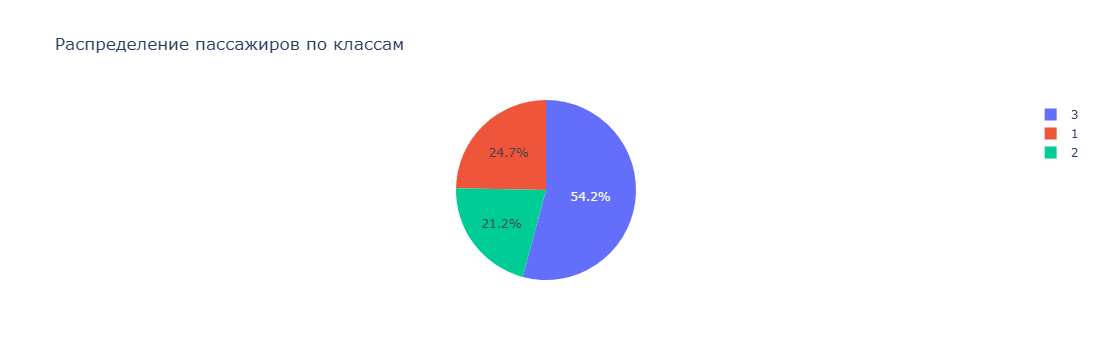

In [18]:
fig6 = px.pie(class_counts, values='count', names='Pclass', 
             title='Распределение пассажиров по классам')
fig6.show()

Box Chart

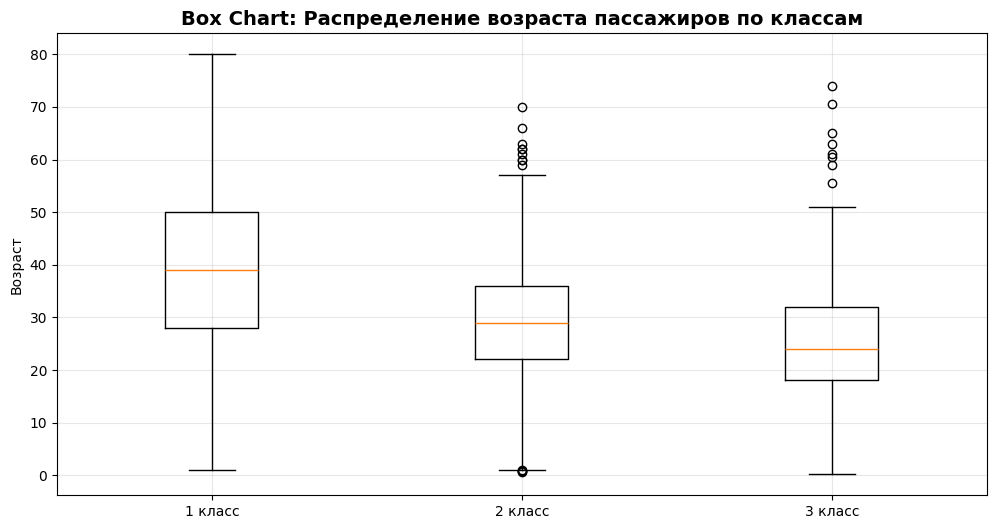

In [19]:
plt.figure(figsize=(12, 6))
box_data = [combined_df[combined_df['Pclass'] == i]['Age'].dropna() for i in [1, 2, 3]]
plt.boxplot(box_data, tick_labels=['1 класс', '2 класс', '3 класс'])
plt.title('Box Chart: Распределение возраста пассажиров по классам', fontsize=14, fontweight='bold')
plt.ylabel('Возраст')
plt.grid(alpha=0.3)
plt.show()

Sunburst Chart

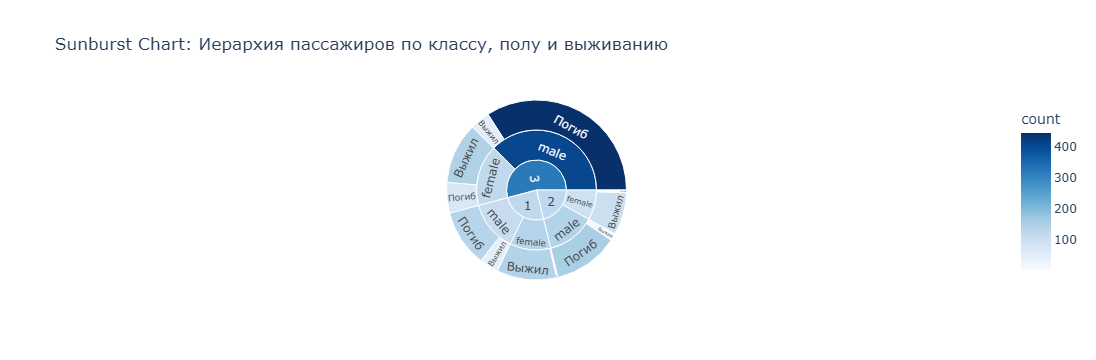

In [20]:
sunburst_data = combined_df.groupby(['Pclass', 'Sex', 'Survived'], observed=False).size().reset_index(name='count')
sunburst_data['Survived'] = sunburst_data['Survived'].map({0: 'Погиб', 1: 'Выжил'})

fig8 = px.sunburst(sunburst_data, path=['Pclass', 'Sex', 'Survived'], values='count',
                  title='Sunburst Chart: Иерархия пассажиров по классу, полу и выживанию',
                  color='count', color_continuous_scale='Blues')
fig8.show()

Heatmap

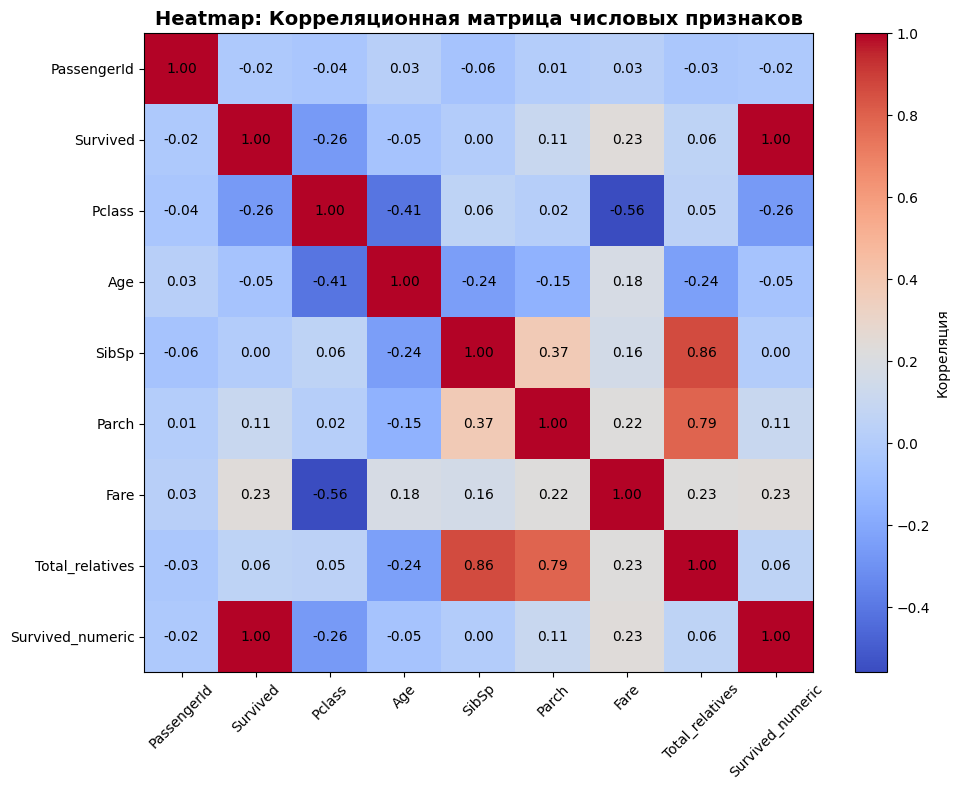

In [33]:
numeric_df = combined_df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar(label='Корреляция')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Heatmap: Корреляционная матрица числовых признаков', fontsize=14, fontweight='bold')

for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', 
                ha='center', va='center', fontsize=10)

plt.tight_layout()
plt.show()

3D Scatter Plot

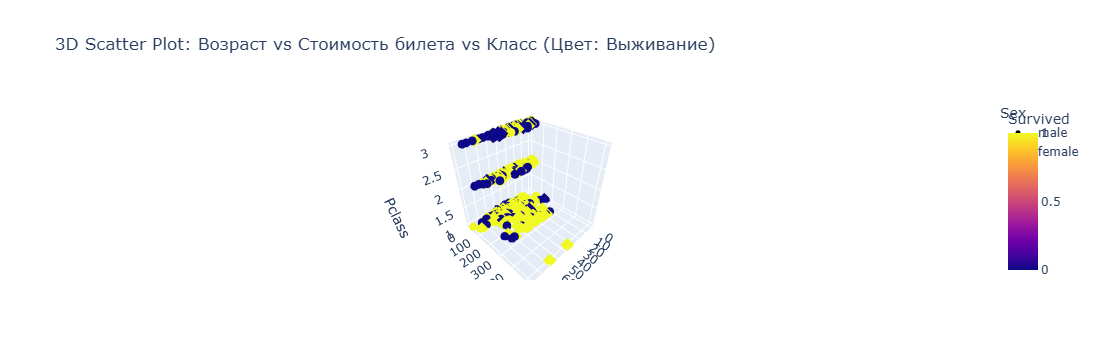

In [22]:
fig9 = px.scatter_3d(combined_df.dropna(subset=['Age', 'Fare', 'Pclass']),
                    x='Age', y='Fare', z='Pclass',
                    color='Survived', 
                    title='3D Scatter Plot: Возраст vs Стоимость билета vs Класс (Цвет: Выживание)',
                    hover_data=['Name', 'Sex'],
                    symbol='Sex')
fig9.update_traces(marker=dict(size=5))
fig9.show()